# Колико Земаља трошимо?
У овом одељку бавићемо се екологијом, тачније утицајем човека на природну средину. Истраживања показују да људи готово дупло брже троше биокапацитете планете Земље него што она успева да их обнови. Укупна потреба људи, заједнице, активности или државе за природним ресурсима за производњу хране и апсорпцију произведеног отпада често се назива *еколошким отиском* (енгл. *ecological footprint*). Еколошки отисак се изражава у *глобалним хектарима* (gha) по становнику, тј. површином плодне земље, шума и воде потребном за задовољење потреба. Ако знамо да је биокапацитет планете Земље тренутно око 1.7 gha по становнику (и да константно опада), можемо да израчунамо __[колико планета "троши" свака држава](https://www.overshootday.org/how-many-earths-or-countries-do-we-need/)__. Тако би нам, на пример, било потребно чак пет Земаља када бисмо сви живели као грађани САД. Интензитет трошења природних ресурса може да се изрази и у потребним државама, па је тако Јапан земља која има највећи несклад између еколошких потреба и могућности јер је њеним грађанима, уз садашњу потрошњу биокапацитета, заправо потребно готово осам Јапана. 

## Пример података о еколошком отиску
У овој вежби ће бити употребљен скуп бесплатних отворених података о еколошком отиску __[**National Footprint and Biocapacity Accounts 2021 Public Data Package**](https://www.footprintnetwork.org/licenses/public-data-package-free/)__ *think tank* институције *Global Footprint Network*. *Think tank* организације су независне институције које се баве истраживањем политика и политичког деловања и имају за циљ да образују или посаветују креаторе политика и јавност кроз разноврсне канале комуникације.

Као што је уобичајено, најпре ћемо увести табелу са подацима и приказати основне информације о њеном садржају.

In [1]:
import pandas as pd

otisak = pd.read_csv('podaci/NFA 2021.csv') 
otisak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        184 non-null    object 
 1   Data Quality                   184 non-null    object 
 2   SDGi                           160 non-null    float64
 3   Life Expectancy                176 non-null    float64
 4   HDI                            184 non-null    float64
 5   GDP per cap                    169 non-null    object 
 6   Region                         184 non-null    object 
 7   Income Group                   184 non-null    object 
 8   Population (mil)               184 non-null    float64
 9   Cropland Footprint             158 non-null    float64
 10  Grazing Footprint              158 non-null    float64
 11  Forest Footprint               158 non-null    float64
 12  Carbon Footprint               158 non-null    flo

Табела се састоји од 184 реда и 25 колона. Већина варијабли садржи податке типа `float64`, односно децималне бројеве са тзв. *пливајућим зарезом*, тј. произвољним бројем децималних места. Информација о типу података нам је веома битна да бисмо знали које анализе можемо да применимо на некој варијабли. У том смислу треба обратити пажњу да чак пет варијабли у табели има тип података `object`, што највероватније указује на то да садрже вредности које су комбинација слова и бројевa. То је посебно сумњиво у случају варијабле *GDP per cap* која би требало да садржи бројчану вредност бруто друштвеног производа (БДП) по становнику. Стога ћемо проверити како би библиотека `pandas` третирала податке из ове колоне. Приказаћемо тип податка (функција `type()`) за први запис у колони (индекс `[0]`).

In [2]:
print('Подаци у колони GDP per cap су типа', type(otisak['Income Group'][0]))

Подаци у колони GDP per cap су типа <class 'str'>


Као што се види, подаци у колони *GDP per cap* су заправо текстуалног типа, тј. дефинисани су као класа `str` (стринг). То значи да би било која алгебарска операција над њима довела до грешке. Приказаћемо првих 5 редова (записа) табеле за све колоне коју садрже податке типа `object` да бисмо лакше установили о чему је реч.

In [3]:
otisak.select_dtypes(include=object).head(5)

,Country,Data Quality,GDP per cap,Region,Income Group
0,Afghanistan,3A,$584,Middle East/Central Asia,LI
1,Albania,3A,"$4,868",Other Europe,UM
2,Algeria,2A,"$4,820",Africa,UM
3,Angola,3A,"$3,414",Africa,LM
4,Antigua and Barbuda,2B,"$13,548",Central America/Caribbean,HI


Варијабле *Country* и *Region* су очекивано стрингови, а колона *Data Quality* је интерна ознака истраживачке институције која показује каквог су квалитета прикупљени подаци, односно колико су поуздани. Међутим, преостале две колоне би у анализама требало да се посматрају као нумеричке. Вредности варијабле *GDP per cap* нису учитане као нумеричке због ознака `$` и `,`. Пре него што обавимо потребне корекције података, приказаћемо јединствене вредности свих варијабли типа `object`. Искључићемо варијаблу `Country` која има превелик број нивоа, тј. јединствених вредности. 

In [4]:
# Правимо нови скуп само од колона типаobject
koloneObj = otisak.select_dtypes(include=object)

# Петљом пролазимо кроз све елемете скупа
for kolona in koloneObj:
    # Креирамо низ од јединствених вредности у колони
    brVred = otisak[kolona].unique()
    # Приказујемо низ ако има мање од 10 елемената
    if len(brVred) < 10: 
        print(otisak[kolona].name, ":", otisak[kolona].unique())

Data Quality : ['3A' '2A' '2B']
Region : ['Middle East/Central Asia' 'Other Europe' 'Africa'
 'Central America/Caribbean' 'South America' 'Asia-Pacific' 'EU-28'
 'North America']
Income Group : ['LI' 'UM' 'LM' 'HI']


Видимо да постоје три ознаке квалитета података које би евентуално могле да послуже као основа за ограничавање анализе на најпоузданије податке (3A). Варијабла *Region* нам омогућава да државе поделимо у осам група, односно региона. На крају, вредности у колони *Income Group* биле би много употребљивије да су означене цифрама од 1 до 4 јер је у питању ранг држава према просечним приходима њених грађана, од најнижег до највишег: *low income (LI)*, *lower medium (LM)*, *upper medium (UM)* и *high (HI)*. Текстуалне ознаке могу да послуже само као основ за категоризацију, док би рангирање ипак пружило могућност за закључивање о разликама у изражености неког својства међу државама.  

>Амерички психолог *Стенли Смит Стивенс* (енгл. *Stanley Smith Stevens*) препоручио је поделу варијабли на основу тзв. *нивоа мерења*. Варијабле се на основу њихове „квантитативне моћи“ деле на номиналне, ординалне, интервалне и размерне. *Номиналне варијабле*, као што је регион, омогућавају нам само да разликујемо ентитете међу собом. *Ординалне* или *ранг варијабле* омогућавају да кажемо који ентитет има више изражено неко својство, али не и за колико више. Таква варијабла је поменута категорија прихода. *Интервалне варијабле* омогућавају и да одговоримо за колико је неки ентитет бољи. На крају, *размерне варијабле* пружају могућност да одговоримо и на питање колико пута је неко својство више или мање изражено јер скале тих варијабли поседују апсолутну нулу. При том виши нивои мерења омогућавају примену напреднијих статистичких поступака. Разлику између последња два типа варијабли није тако лако направити. На пример, висина је размерна варијабла јер би 0 заиста значила одсуство висине, али температура у Целзијусима је само интервална јер је 0 арбитрарно одређена као тачка на којој се вода претвара у лед и не значи „одсуство“ температуре. За основно разумевање статистичких анализа довољно је да корисник уме да разликује прва три нивоа.

У колони *GDP per cap* најпре ћемо уклонити знаке `$` и `,` а потом конвертовати варијаблу из типа `object` у тип `float`. Да бисмо ефикасније обавили измену употребићемо тзв. *регуларне изразе* (енгл. __[*regular expressions*](https://docs.python.org/3/library/re.html)__), па је стога аргумент `regex` функције `replace` постављен на `True`. У угластим заградама смо навели све ознаке (`[$,]`) које желимо да заменимо празном ниском (`''`). Иако се користе специјални карактери, регуларни изрази су у суштини текстуалне ниске, па их морамо стављати под наводнике.

In [5]:
otisak['GDP per cap'] = otisak['GDP per cap'].replace('[$,]','', regex=True)
otisak['GDP per cap'] = otisak['GDP per cap'].astype(float, errors = 'raise')

Након тога ћемо заменити вредности варијабле `Income Group` и записати их у нову варијаблу `Income Group R`.

In [6]:
otisak['Income Group R'] = otisak['Income Group'].replace({ 'LI' : 1, 'LM' : 2, 'UM' : 3, 'HI' : 4 })

>За манипулацију подацима често ћемо користи Пајтон објекат `dictionary` или *речник*. Овај објекат ћете препознати као низ парова вредности одвојених двотачкама и обухваћених витичастим заградама. Објекат овог типа има општи облик `objekat = {<кључ>: <вредност>, <кључ>: <вредност>}`, па се тако нпр. може направити речник главних градова држава: `gradovi = {'Србија': 'Београд', 'Немачка': 'Берлин', 'Француска': 'Париз'}`.

Коначно, приказаћемо дистрибуцију вредности БДП уз помоћ хистограма, а дистрибуцију категорија прихода по становнику стубичастим дијаграмом. Претходно ћемо сортирати вредности ове друге варијабле по колони `Income Group R` како би се на графикону на првом месту појавио стубић који означава ниске приходе (LI), а на последњем високе (HI).

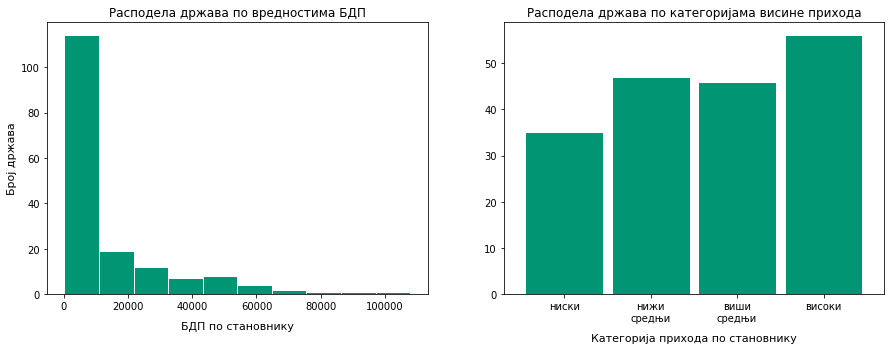

In [7]:
import matplotlib.pyplot as plt

# Правимо објекат figure који ће садржати два (под)графикона
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Искључујемо државе које имају БДП 0 јер је у питању очигледна грешка и приказујемо хистограм
otisak[otisak['GDP per cap'] > 0]['GDP per cap'].plot(kind='hist', edgecolor='white', color='#019573', ax=ax1)

# Постављамо наслов левог графикона и називе x- и y-осе
ax1.set_title("Расподела држава по вредностима БДП", fontsize=12) 
ax1.set_xlabel("БДП по становнику", labelpad=10, fontsize=11) 
ax1.set_ylabel('Број држава', fontsize=11)  

# Пребројавамо државе у свакој категорији и наводимо редослед категорија који желимо
otisak.sort_values(by='Income Group R')['Income Group'].value_counts()[['LI','LM','UM','HI']].plot(kind='bar', width=0.90, edgecolor='white', color='#019573', ax=ax2)

# Постављамо наслов десног графикона и називе x- и y-осе
ax2.set_title("Расподела држава по категоријама висине прихода", fontsize=12) 
ax2.set_xlabel("Категорија прихода по становнику", labelpad=10, fontsize=11) 
ax2.set_xticklabels(labels=['ниски','нижи\nсредњи','виши\nсредњи','високи'], rotation=0) 

plt.show()

Горњи графикони илуструју важност прецизне дефиниције и одабира варијабли којима се исказује израженост неког феномена. Подела на категорије приказана на десном графикону очигледно прикрива изузетну искошеност расподеле богатства међу земљама. Критеријуми Светске банке за сврставање у категорију земаља са високим приходима је око 12.000 долара годишње по становнику, али тек на основу левог графикона видимо да је то уједно и категорија у којој постоји највећа варијабилност. Горња граница овог распона, односно десни крај издуженог „репа“ дистрибуције приказане на левом графикону, готово десет пута је већа од доње. Десни графикон сугерише да има највише држава са вишим и високим просечним приходима, али на основу левог видимо да је највеће богатство заправо сконцентрисано у релативно малој групи држава.

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Промените параметар <b>otisak['GDP per cap'] > 0</b> у горњем кôду тако да на левом графикону буду приказане само земље које имају просечан БДП мањи од 12.000 долара по становнику. Да ли је дистрибуција и даље толико искошена?</div> 

На крају, погледајмо колико планета је потребно појединачним државама, тј. колико ресурса би било потребно када бисмо сви на планети живели као грађани тих држава. Приказаћемо дистрибуцију варијабле *Number of Earths required* и означићемо границу на подеоку 1, што је вредност која показује да држава троши онолико природних ресурса колико их и има на располагању. За исцртавање овог графикона употребићемо библиотеку `seaborn`.

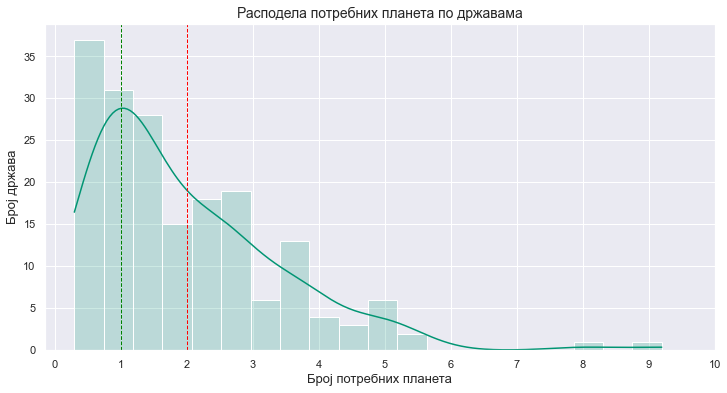

In [24]:
import seaborn as sbrn

# Поставићемо сиву позадину графикона
sbrn.set_theme(style='darkgrid')

# Дефинишемо величину графикона
fig = plt.figure(figsize=(12,6))

# Исцртавамо хисторграм заједно са кривом која приказује контуре дистрибуције (kde=True)
graf = sbrn.histplot(otisak['Number of Earths required'], kde=True, bins=20, alpha=0.2, color='#019573')

# Подешавамо наслов графикона и називе оса
plt.title('Расподела потребних планета по државама', fontsize=14)
plt.xlabel('Број потребних планета', fontsize=13)
plt.ylabel('Број држава', fontsize=13)

# Криву густине вероватноћа смештатамо у објекат kriva  
kriva = graf.get_lines()[0]

# Подешавамо распон подеока на x-оси
plt.xticks(range(0, 11))

# Исцртавамо референтне линије изнад вредности 1 и 2
plt.axvline(1, linestyle='--', color='green', lw=1)
plt.axvline(2, linestyle='--', color='red', lw=1)

# Приказујемо графикон
plt.show()


Очигледно је да већина држава има веома високе вредности еколошког отиска што значи да би нам требало и до 9 Земаља када бисмо сви живели као грађани ових држава. Додуше, држава са вредностима изнад 6 има релативно мало и веома су удаљене од осталих. Овакве вредности називамо *аберантним* или, популарније, *аутлајерима*. Да бисмо лакше повезали површине графикона, односно површине испод приказане криве дистрибуције података, направићемо табелу учесталости различитих категорија држава и приказати њихов удео у укупном броју држава. Обратите пажњу да смо уз стубиће приказали и тзв. *криву густине вероватноћа* која нам омогућава да лакше проценимо колики је удео вредности у неком интервалу или изнад и испод неке тачке. Прецизније, ова крива нам омогућава да проценимо вероватноћу неког исхода на основу емпиријских података које смо прикупили. Хистограм приказује расподеле учесталости (вероватноћа) на практичнији и интуитивнији начин, док је крива густине вероватноће нешто сложенији математички и теоријски концепт.

Употребићемо функцију `select` библиотеке `numpy` којом ћемо направити нову варијаблу са ознакама категорија на основу броја потребних земаља. Уочите да смо једну дугу линију кода преломили уз помоћ обрнуте косе црте `\` (енгл. *backslash*. У резултирајућој табели учесталости смо направили колону са пропорцијама чије су вредности израчунате као однос броја држава у категорији и укупног броја држава израчунатог помоћу функције `sum()`. Вредност је заокружена на две децимале уз помоћ функције `round(2)`.

In [9]:
import numpy as np

# Формираћемо интервале веријабле (< 1, 1, 1-2 и >=2)
granice = [ otisak['Number of Earths required'] < 1, 
            otisak['Number of Earths required'] == 1, 
            otisak['Number of Earths required'].between(1, 2, inclusive='neither'),
            otisak['Number of Earths required'] >=2
          ]

# Интервалима (категоријама) ћемо доделити једноставне називе због лакшег сортирања
kategorije = ['a', 'b', 'c', 'd']

# Сортирамо табелу по колони Number of Earths required
otisak.sort_values('Number of Earths required')

# Формирамо нову варијабли на основу дефинисаних распона и назива категорија
otisak['NER_Kat'] = np.select(granice, kategorije, default=np.nan)

# Правимо табелу учесталости (код преламамо оператором \ због превелике дужине)
# Мењамо називе колона функцијом rename_axis()
tabFrek = otisak['NER_Kat'].value_counts(sort=False). \
  rename_axis('Број потребних планета').reset_index(name='Број држава'). \
  replace(['a', 'b', 'c', 'd'], ['мање од једне', 'једна', 'између једне и две', 'више од две'])

# Додајемо колону п у којој су учесталости претворене у пропорције дељењем нјховом сумом
tabFrek['p'] = (tabFrek['Број држава'] / tabFrek['Број држава'].sum()).round(2) 

# Приказујемо табелу
tabFrek

,Број потребних планета,Број држава,p
0,мање од једне,47,0.26
1,између једне и две,55,0.30
2,више од две,76,0.41
3,једна,6,0.03


Из приказане табеле јасније се види да више од 70% држава троши више природних ресурса него што их имамо на располагању. Проценат држава које се налазе између зелене и црвене граничне линије на графикону је 30%, али такође видимо да око 26% држава има релативно низак еколошки отисак и да разумно троши биокапацитете Земље.

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Криву густине вероватноћа на последњем графикону сачували смо као објекат уз помоћ метода <b>get_lines()</b>. Претражите методе објекта <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html"><b>Line2D</b></a> и покушајте самостално да измените боју и изглед линије. Имајте на уму да су вам потребени методи који почињу са <b>set_</b> и да промену морате да начините пре последње линије кôда, најбоље одмах после дефинисања објекта <b>kriva</b>.</div> 

На крају, пошто ћемо исте податке користити и у наредним анализама, снимићемо их у нову csv датотеку да не бисмо поново морали да правимо измене које смо начинили у овој лекцији. Датотеку ћемо назвати *NFA 2021 v2*.

In [10]:
otisak.to_csv('podaci/NFA 2021 v2.csv', index=False)

**Колико Земаља трошимо?**

Најтачнији одговор на питање из наслова је да трошимо више него што имамо. Иако постоје државе које имају релативно низак еколошки отисак, у већини њих се живи животом који подразумева вишеструко брже трошење биокапацитета планете од способности природе да их обнови.